IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER PRENDERE I FILE CSV PER LA CREAZIONE DEL DATAFRAME FINALE

In [2]:
path_file = os.path.abspath(os.getcwd()) #prendiamo il path in cui si trova il file su cui stiamo lavorando
print(path_file)
os.chdir(path_file) #cambiamo directory al fine di poter prendere i file csv per la creazione del dataframe

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


DATAFRAME CHE CONTERRA' I DATI DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi con estensione csv nella cartella path_file
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
df_1 = pd.DataFrame() #creazione di un dataframe vuoto

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    df_1 = df_1.append(df,ignore_index=True)

RIMOZIONE DI EVENTUALI DUPLICATI

In [4]:
df_1=df_1.drop_duplicates()
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            96.0    3.596543    3.414090 -0.014483  ...  1316

SHUFFLING DEL DATAFRAME

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      65.0 -0.015074   0.017905    3.518443   0.134496          0.0   
1      34.0 -0.023315   0.017985    4.085402   0.135947          0.0   
2      31.0 -0.136530   0.032746   -0.740513   0.226498          0.0   
3      41.0 -0.062685   0.011390    0.361689   0.123655          0.0   
4      94.0 -0.003359   0.007144   -0.260725   0.084496          0.0   
...     ...       ...        ...         ...        ...          ...   
1344   95.0 -0.003539   0.007143   -0.259690   0.084493          0.0   
1345   21.0  0.006520   0.007573   -0.459953   0.087149          0.0   
1346   63.0 -0.064419   0.010924    0.487422   0.122668          0.0   
1347   32.0  0.019235   0.048111    2.942027   0.219898         73.0   
1348   30.0  0.020006   0.048151    2.954738   0.220056         71.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0           112.0   15.875431    5.269768 -0.011365  ...  2733

RIMOZIONE DELLA COLONNA RELATIVA AL TEMPO (ESPRESSO IN SECONDI)

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.015074   0.017905    3.518443   0.134496          0.0        112.0   
1    -0.023315   0.017985    4.085402   0.135947          0.0         92.0   
2    -0.136530   0.032746   -0.740513   0.226498          0.0        109.0   
3    -0.062685   0.011390    0.361689   0.123655          0.0         75.0   
4    -0.003359   0.007144   -0.260725   0.084496          0.0        103.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.003539   0.007143   -0.259690   0.084493          0.0         95.0   
1345  0.006520   0.007573   -0.459953   0.087149          0.0         85.0   
1346 -0.064419   0.010924    0.487422   0.122668          0.0         90.0   
1347  0.019235   0.048111    2.942027   0.219898         73.0         72.0   
1348  0.020006   0.048151    2.954738   0.220056         71.0         93.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp2(

### Bilanciamento del dataset mediante oversampling

In [7]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [8]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.015074   0.017905    3.518443   0.134496     0.000000   112.000000   
1    -0.023315   0.017985    4.085402   0.135947     0.000000    92.000000   
2    -0.136530   0.032746   -0.740513   0.226498     0.000000   109.000000   
3    -0.062685   0.011390    0.361689   0.123655     0.000000    75.000000   
4    -0.003359   0.007144   -0.260725   0.084496     0.000000   103.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.003998   0.007205   -0.253945   0.084881     0.000000    92.330074   
1619 -0.121854   0.037983   -0.355923   0.229644    75.809590    56.000000   
1620 -0.030942   0.007702   -0.700597   0.092955   100.117770    78.462519   
1621 -0.025979   0.007278   -0.562953   0.089073    98.756724    75.695904   
1622 -0.140653   0.039382   -1.461979   0.243040    92.248663    91.248663   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp1(

# Selezione feature più importanti (mediante ANOVA)

In [9]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_classif, k=15)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=15)
[False False False False False False False False  True  True False  True
  True False  True False False False False  True False False False False
  True False False False  True False  True  True  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


SCORE DELLE FEATURES

In [10]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

    Input_Features     F_Score
12     freq1(GyrY)  846.724508
28     freq1(AccX)  833.064424
34      kurt(AccY)  797.127448
32        <>(AccY)  685.424984
30      amp1(AccX)  679.262727
24        <>(AccX)  624.891133
78        amp1(C9)  620.768122
35       RMS(AccY)  618.707510
8         <>(GyrY)  593.155474
31      amp2(AccX)  566.017685
19       RMS(GyrZ)  487.350844
79        amp2(C9)  484.089655
9        var(GyrY)  483.167275
11       RMS(GyrY)  461.566985
14      amp1(GyrY)  449.653700
17       var(GyrZ)  433.261589
46      amp1(AccZ)  432.308338
111      amp2(C13)  393.013088
41       var(AccZ)  389.007691
6       amp1(GyrX)  386.843541
103      amp2(C12)  374.233854
110      amp1(C13)  366.444423
56       <>(Pitch)  347.495045
97        var(C12)  333.283579
81        var(C10)  324.916588
118      amp1(C14)  321.265778
62     amp1(Pitch)  310.381150
22      amp1(GyrZ)  288.611210
48        <>(Roll)  283.146498
4      freq1(GyrX)  275.115213
98       kurt(C12)  273.307218
10      

In [11]:
#creazione di una lista in cui andiamo a mettere le feature che non sono state selezionate dal metodo ANOVA
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 29, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


RIMOZIONE DELLE FEATURE NON SELEZIONATE

In [12]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  RMS(GyrZ)  \
0    -0.011365   0.013367   0.116035     0.000000    8.254329   0.149315   
1    -0.007297   0.013928   0.118089     0.000000   15.074528   0.151299   
2     0.007312   0.004555   0.067799    65.000000    1.730832   0.165549   
3     0.013037   0.006309   0.080395    94.000000    3.093811   0.121922   
4     0.012145   0.005181   0.072917   119.000000    1.986557   0.152905   
...        ...        ...        ...          ...         ...        ...   
1618  0.011871   0.005174   0.072827   119.338874    1.975726   0.152758   
1619  0.039740   0.010334   0.109031   104.238360    3.689675   0.125632   
1620  0.050698   0.012451   0.122438   117.000000   20.602416   0.146769   
1621  0.047066   0.012534   0.121316   113.000000   19.311567   0.149212   
1622  0.026066   0.008712   0.096801    99.081104    2.896000   0.149531   

      <>(AccX)  freq1(AccX)  amp1(AccX)  amp2(AccX)  <>(AccY)  kurt(AccY)  \
0    -0.04

### Separazione del dataset in training e test

In [13]:
# Random state
rs = 42

# split del dataset in training (80%) e test (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# dimensioni degli insiemi di training e test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 15)
(325, 15)
(1298, 1)
(325, 1)


DEFINIZIONE DEI CLASSIFICATORI CHE VERRANNO POI UTILIZZATI PER CLASSIFICARE I DATI

In [14]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs, criterion="entropy",max_depth=1),
    RandomForestClassifier(n_estimators = 1000,max_depth=1, random_state=rs,bootstrap=False),
    SVC(probability=True), #Support Vector Machine
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

clf_name = [] # nomi dei classificatori
model_results = pd.DataFrame.copy(y_test) #risultato della predizione dal modello

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores della cross-validation
cv_acc = [] # accuratezza media della cross-validation, da massimizzare
cv_std = [] # deviazione standard della cross-validation, ma minimizzare

cnfm = [] #matrici di confusione
clr = [] #report della classificazione

### CLASSIFICAZIONE

Cross-Validation: [0.81923077 0.81923077 0.80769231 0.83011583 0.83783784]
Accuracy: 0.81 	 ---> LogisticRegression 


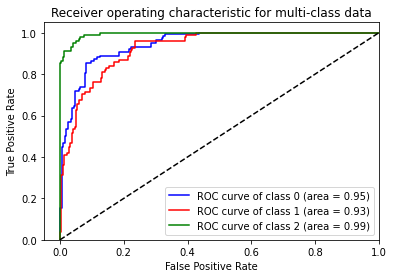

----------------------------------------------------
Cross-Validation: [0.65       0.66538462 0.65       0.66409266 0.66409266]
Accuracy: 0.66 	 ---> DecisionTreeClassifier 


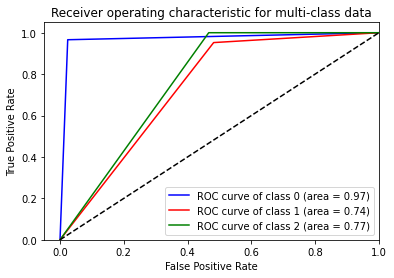

----------------------------------------------------
Cross-Validation: [0.95       0.96538462 0.93076923 0.95752896 0.96911197]
Accuracy: 0.95 	 ---> RandomForestClassifier 


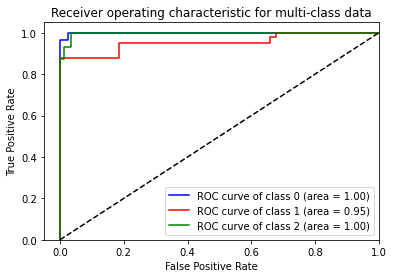

----------------------------------------------------
Cross-Validation: [0.62692308 0.63461538 0.65769231 0.66795367 0.69111969]
Accuracy: 0.67 	 ---> SVC 


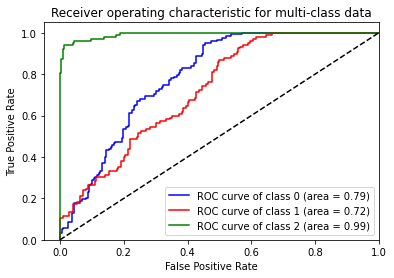

----------------------------------------------------
Cross-Validation: [0.85769231 0.68461538 0.9        0.85328185 0.94980695]
Accuracy: 0.87 	 ---> MLPClassifier 


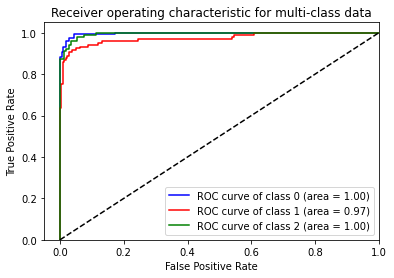

----------------------------------------------------
Cross-Validation: [0.52307692 0.63846154 0.80384615 0.62162162 0.63320463]
Accuracy: 0.78 	 ---> SGDClassifier 


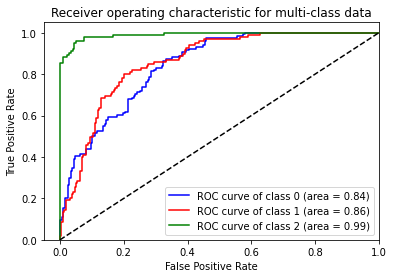

----------------------------------------------------


In [15]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3 # numero di classi in cui andremo a classificare

j=0
# training degli algoritmi e risultati
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting del modello e predizione
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))

    # procedimento per la costruzione della curva ROC a tre classi
    if (j == 1) | (j == 2) | (j == 4):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### MATRICI DI CONFUSIONE

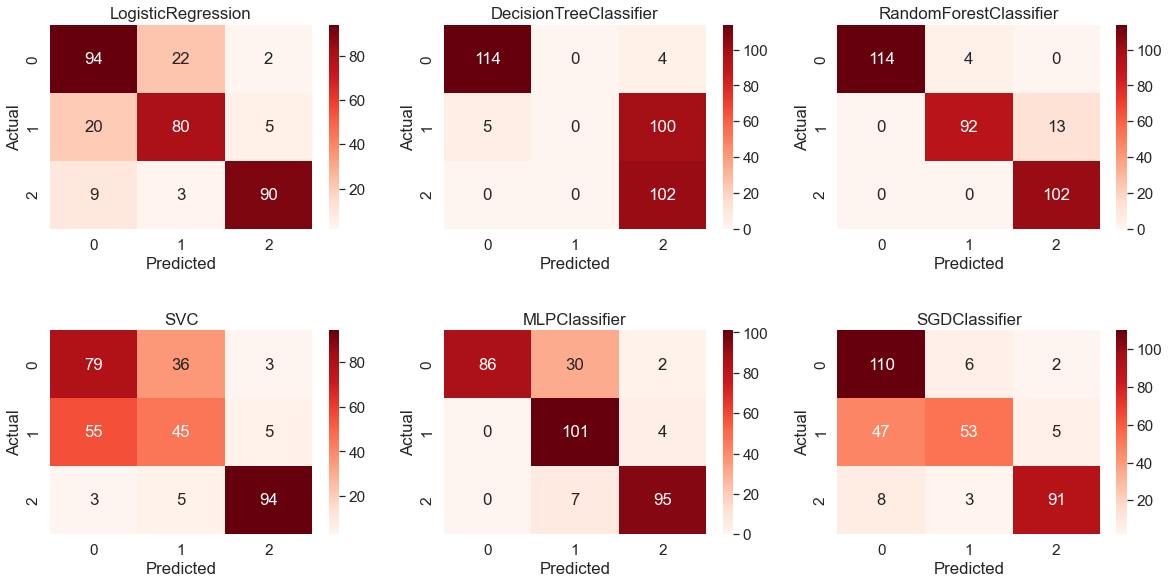

In [16]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1)
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

CROSS VALIDATION SCORES

Text(0.5, 1.0, 'Cross validation scores')

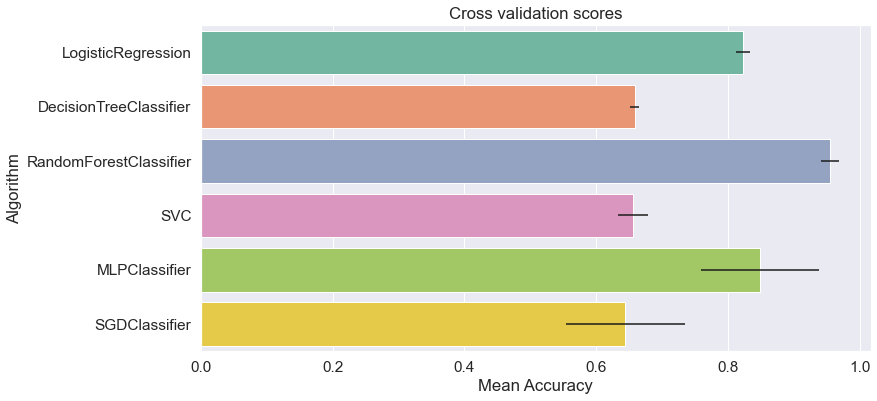

In [17]:
# Grafico per l'analisi dell'accuratezza media ed errore risultante dalla cross-validation
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

### REPORT CLASSIFICAZIONE

In [18]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       118
           1       0.76      0.76      0.76       105
           2       0.93      0.88      0.90       102

    accuracy                           0.81       325
   macro avg       0.82      0.81      0.82       325
weighted avg       0.81      0.81      0.81       325

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       118
           1       0.00      0.00      0.00       105
           2       0.50      1.00      0.66       102

    accuracy                           0.66       325
   macro avg       0.48      0.66      0.54       325
weighted avg       0.50      0.66      0.56       325

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      